![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Proyecto final - Data Analytics y Business Intelligence

Recibimos dos datasets:

1. `renfe.csv`: Información de búsquedas de billetes que se ha extrajo de la página de Renfe.
2. `coordenadas_ciudades.csv`: Latitud y longitud de provincias españolas.

Queremos usar estos datasets para un modelo de Machine Learning que utilizaremos para predecir los precios de los billetes. Y, para ello, necesitamos limpiar, explorar y pre-procesar el dataset.

## Reglas de juego

1. El proyecto se debe entregar de manera individual. 
2. Cada respuesta correcta suma un punto.
3. La calificación final consistirá en la suma de todos los puntos obtenidos sobre el total de puntos posibles.


## Diccionario de datos

Esta es la información provista:

### `renfe.csv`
- `FECHA_CONSULTA`: Fecha en la que se consultó la página.
- `FECHA_INICIO`: Fecha de inicio del trayecto.
- `FECHA_FIN`: Fecha de finalización del trayecto.
- `CIUDAD_ORIGEN`: Ciudad de origen del trayecto.
- `CIUDAD_DESTINO`: Ciudad destino del trayecto.
- `TIPO_TREN`: Tipo de tren.
- `TIPO_TARIFA`: Tipo de tarifa del billete.
- `CLASE`: Clase del asiento seleccionado.
- `PRECIO`: Precio del tren seleccionado.

### `coordenadas_ciudades.csv`
- `ciudad`: Nombre de la ciudad.
- `latitud`: Coordenada de latitud de la ciudad.
- `longitud`: Coordenada de longitud de la ciudad.

## Importar librerías

In [2]:
import pandas as pd
import numpy as np

## P0: Lee el dataset `renfe.csv`

In [3]:
df_renfe=pd.read_csv("renfe.csv",sep=";")

## P1: Visualiza las primeras y las últimas filas del dataset

In [4]:
df_renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [5]:
df_renfe.tail().T


,383563,383564,383565,383566,383567
FECHA_CONSULTA,2019-05-06 05:11:53,2019-06-19 21:48:56,2019-04-24 23:21:44,2019-05-27 21:05:19,2019-05-27 15:04:14
FECHA_INICIO,2019-05-10 19:40:00,2019-08-05 20:00:00,2019-04-29 16:15:00,2019-07-07 15:00:00,2019-06-16 18:35:00
FECHA_FIN,2019-05-10 21:29:00,2019-08-05 23:10:00,2019-04-29 17:55:00,2019-07-07 17:21:00,2019-06-16 20:21:00
CIUDAD_ORIGEN,MADRID,BARCELONA,VALENCIA,MADRID,VALENCIA
CIUDAD_DESTINO,VALENCIA,MADRID,MADRID,SEVILLA,MADRID
TIPO_TREN,AVE,AVE,AVE,AVE,AVE
TIPO_TARIFA,Flexible,Promo,Promo,Promo,Flexible
CLASE,Turista,Preferente,Turista,Turista,Turista
PRECIO,73.1,54.45,27.8,47.3,73.1


## P2: ¿Cuantas filas y columnas tiene el dataset?

In [6]:
df_renfe.shape

(383568, 9)

## P3: Cambia los nombres de todas las columnas a minúsculas

In [7]:
df_renfe.columns=df_renfe.columns.str.lower()

## P4: Muestra los tipos de datos de cada columna

In [8]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fecha_consulta  383568 non-null  object 
 1   fecha_inicio    383568 non-null  object 
 2   fecha_fin       383568 non-null  object 
 3   ciudad_origen   383568 non-null  object 
 4   ciudad_destino  383568 non-null  object 
 5   tipo_tren       383568 non-null  object 
 6   tipo_tarifa     382225 non-null  object 
 7   clase           382225 non-null  object 
 8   precio          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


## P5: Cambia los tipos de datos que creas que creas incorrectos, por los tipos adecuados

In [9]:
df_renfe["fecha_consulta"] = pd.to_datetime(df_renfe["fecha_consulta"])
df_renfe["fecha_inicio"] = pd.to_datetime(df_renfe["fecha_inicio"])
df_renfe["fecha_fin"] = pd.to_datetime(df_renfe["fecha_fin"])

In [10]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fecha_consulta  383568 non-null  datetime64[ns]
 1   fecha_inicio    383568 non-null  datetime64[ns]
 2   fecha_fin       383568 non-null  datetime64[ns]
 3   ciudad_origen   383568 non-null  object        
 4   ciudad_destino  383568 non-null  object        
 5   tipo_tren       383568 non-null  object        
 6   tipo_tarifa     382225 non-null  object        
 7   clase           382225 non-null  object        
 8   precio          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 26.3+ MB


## P6: Filas duplicadas

### P6.1: ¿Cuántas filas duplicadas tiene el dataset?

In [11]:
df_renfe.duplicated().value_counts()

False    383535
True         33
dtype: int64

### P6.2: Quita las filas duplicadas

In [12]:
df_renfe[df_renfe.duplicated(keep=False)]

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
8530,2019-06-10 01:10:54,2019-07-07 21:03:00,2019-07-07 23:28:00,VALENCIA,MADRID,INTERCITY,Promo,Turista,43.75
9179,2019-08-17 03:22:19,2019-09-01 21:03:00,2019-09-01 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,NaN
14256,2019-05-03 05:33:32,2019-05-24 15:10:00,2019-05-24 17:20:00,MADRID,VALENCIA,INTERCITY,Promo,Turista,43.75
24392,2019-05-15 21:26:30,2019-06-23 21:05:00,2019-06-23 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
29786,2019-05-13 05:35:59,2019-05-26 17:30:00,2019-05-26 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
...,...,...,...,...,...,...,...,...,...
356200,2019-05-03 15:18:26,2019-05-24 15:10:00,2019-05-24 17:20:00,MADRID,VALENCIA,INTERCITY,Promo,Turista,43.75
362709,2019-06-22 07:11:59,2019-07-03 21:03:00,2019-07-03 23:28:00,VALENCIA,MADRID,INTERCITY,Promo,Turista,29.90
372763,2019-08-16 05:36:33,2019-08-16 21:03:00,2019-08-16 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
376617,2019-05-17 15:22:08,2019-07-11 21:03:00,2019-07-11 23:28:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN


In [13]:
df_renfe=df_renfe.drop_duplicates()

In [14]:
df_renfe.duplicated().value_counts()

False    383535
dtype: int64

## P7: Valores nulos y análisis de `precio`

In [15]:
df_renfe.isna().sum()

fecha_consulta        0
fecha_inicio          0
fecha_fin             0
ciudad_origen         0
ciudad_destino        0
tipo_tren             0
tipo_tarifa        1338
clase              1338
precio            28515
dtype: int64

### P7.1: ¿Que porcentaje de valores nulos hay por cada columna?

In [16]:
df_renfe.isna().mean()*100

fecha_consulta    0.000000
fecha_inicio      0.000000
fecha_fin         0.000000
ciudad_origen     0.000000
ciudad_destino    0.000000
tipo_tren         0.000000
tipo_tarifa       0.348860
clase             0.348860
precio            7.434784
dtype: float64

### P7.2: ¿Cual es el mínimo, percentiles importantes (25%, 50%, 75%) y el máximo de `precio`?

In [17]:
df_renfe.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,355020.0,61.436162,25.696218,0.0,41.2,58.15,76.3,342.8


### P7.3: ¿Hay algo raro en el valor mínimo de `precio`? Quita las filas con ese valor del dataset

In [18]:
df_renfe.precio.isna().sum()


28515

In [19]:
df_renfe.precio.mean()

61.436161681043956

### P7.4: Reemplaza los valores nulos en `precio` por la media de esa columna

In [20]:
df_renfe["precio"]=df_renfe["precio"].fillna((df_renfe["precio"].mean()))


In [21]:
df_renfe.precio.isna().sum()

0

### P7.5: Quita las filas donde `clase` o `tipo_tarifa` sean nulos

In [22]:
df_renfe.clase.isna().sum()
df_renfe.tipo_tarifa.isna().sum()

1338

In [23]:
df_renfe = df_renfe.dropna(axis=0, subset=['clase',"tipo_tarifa"])

In [24]:
df_renfe.clase.isna().sum()
df_renfe.tipo_tarifa.isna().sum()

0

## P8: Tiempo de viaje

### P8.1: Calcula el tiempo de viaje en minutos (fecha_fin - fecha_inicio)

In [25]:
from datetime import datetime
import time

In [26]:
df_renfe['diff'] = (df_renfe['fecha_fin'] - df_renfe['fecha_inicio'])

In [27]:
df_renfe['tiempo_de_viaje'] = (df_renfe['fecha_fin'] - df_renfe['fecha_inicio']) / pd.Timedelta(minutes=1)

In [28]:
df_renfe.head().T

,0,1,2,3,4
fecha_consulta,2019-05-25 01:43:03,2019-06-22 13:05:11,2019-04-17 06:24:03,2019-05-10 21:21:59,2019-05-09 19:43:37
fecha_inicio,2019-06-28 20:36:00,2019-07-14 10:00:00,2019-05-23 13:40:00,2019-05-29 14:50:00,2019-06-26 13:25:00
fecha_fin,2019-06-28 23:14:00,2019-07-14 13:10:00,2019-05-23 16:10:00,2019-05-29 22:30:00,2019-06-26 16:24:00
ciudad_origen,SEVILLA,BARCELONA,SEVILLA,VALENCIA,MADRID
ciudad_destino,MADRID,MADRID,MADRID,MADRID,BARCELONA
tipo_tren,ALVIA,AVE,AVE,REGIONAL,AVE-TGV
tipo_tarifa,Flexible,Flexible,Promo,Adulto ida,Promo
clase,Turista,Turista,Turista,Turista,Turista
precio,67.2,107.7,47.3,28.35,66.75
diff,0 days 02:38:00,0 days 03:10:00,0 days 02:30:00,0 days 07:40:00,0 days 02:59:00


### P8.2: Haz un histograma de la variable que acabas de crear (`tiempo_de_viaje`)

<AxesSubplot:title={'center':'Tiempo_de_viaje'}, ylabel='Frequency'>

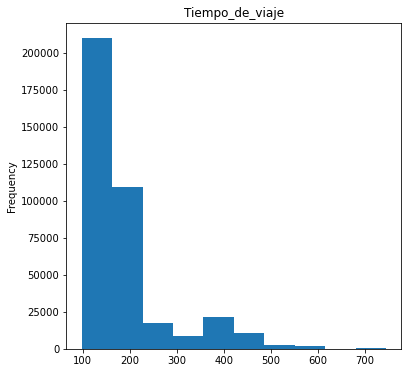

In [29]:
df_renfe[["tiempo_de_viaje"]].plot(kind="hist", figsize=(6, 6), title="Tiempo_de_viaje", legend=None)

## P9: Extrae el día, el nombre del día, el mes y la hora de `fecha_inicio`

In [30]:

from calendar import monthrange
from calendar import day_name

dt = df_renfe.fecha_inicio
day, month, year = (int(x) for x in dt.split('/'))    
ans = datetime.date(year, month, day)
print ans.strftime("%A")

SyntaxError: invalid syntax (<ipython-input-30-9a6f53784086>, line 7)

## P10: Quita las columnas `fecha_consulta`, `fecha_inicio` y `fecha_fin` del dataset

In [ ]:
df_renfe.head().T

,0,1,2,3,4
fecha_consulta,2019-05-25 01:43:03,2019-06-22 13:05:11,2019-04-17 06:24:03,2019-05-10 21:21:59,2019-05-09 19:43:37
fecha_inicio,2019-06-28 20:36:00,2019-07-14 10:00:00,2019-05-23 13:40:00,2019-05-29 14:50:00,2019-06-26 13:25:00
fecha_fin,2019-06-28 23:14:00,2019-07-14 13:10:00,2019-05-23 16:10:00,2019-05-29 22:30:00,2019-06-26 16:24:00
ciudad_origen,SEVILLA,BARCELONA,SEVILLA,VALENCIA,MADRID
ciudad_destino,MADRID,MADRID,MADRID,MADRID,BARCELONA
tipo_tren,ALVIA,AVE,AVE,REGIONAL,AVE-TGV
tipo_tarifa,Flexible,Flexible,Promo,Adulto ida,Promo
clase,Turista,Turista,Turista,Turista,Turista
precio,67.2,107.7,47.3,28.35,66.75
diff,0 days 02:38:00,0 days 03:10:00,0 days 02:30:00,0 days 07:40:00,0 days 02:59:00


In [ ]:
#df_renfe.drop(['fecha_inicio', 'fecha_fin', 'fecha_consulta'], axis=1, inplace=True) CHECK

## P11: Lee el dataset `coordenadas_ciudades.csv` y únelo con al dataset que has procesado hasta ahora (utiliza `ciudad_destino` para el `join`)

In [ ]:
df_coord=pd.read_csv("coordenadas_ciudades.csv",sep=";")

In [ ]:
df_coord

,"ciudad,latitud,longitud"
0,"MADRID,40.4167047,-3.7035825"
1,"BARCELONA,41.3828939,2.1774322"
2,"SEVILLA,37.3886303,-5.9953403"
3,"VALENCIA,39.4699014,-0.3759513"
4,"PONFERRADA,42.5454124,-6.5938719"


In [ ]:
df_joined=pd.concat(
    "df_renfe","df_coord"
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

SyntaxError: invalid syntax (<ipython-input-432-10ccc69c9ede>, line 3)

## P12: Gráfica en un mapa el precio medio por ciudad de destino

In [31]:
df_preciomedio=df_renfe.loc[:,['precio','ciudad_destino']]
df_preciomedio


,precio,ciudad_destino
0,67.20,MADRID
1,107.70,MADRID
2,47.30,MADRID
3,28.35,MADRID
4,66.75,BARCELONA
...,...,...
383563,73.10,VALENCIA
383564,54.45,MADRID
383565,27.80,MADRID
383566,47.30,SEVILLA


In [32]:
df_preciomedio.groupby('ciudad_destino').mean()

,precio
ciudad_destino,
BARCELONA,85.360816
MADRID,60.699402
PONFERRADA,45.650315
SEVILLA,58.818346
VALENCIA,42.637564


## P13: Haz una tabla de correlación, ¿hay variables númericas correladas con el precio?

## P14: Relación entre variables del dataset y `precio`

### P14.1: Haz un scatter plot de precio vs. tiempo de viaje

### P14.2: Haz un boxplot de precio vs. dia de la semana

### P14.3: Gráfica el precio medio por día de la semana

## P15: Crea un nuevo dataframe donge apliques *one-hot-encoding* a las variables categoricas